### Importación de datos



In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#Prepocesamiento base de datos

En primer lugar uniremos las bases de datos:

In [30]:
tienda['tienda'] = 'tienda_1'
tienda2['tienda'] = 'tienda_2'
tienda3['tienda'] = 'tienda_3'
tienda4['tienda'] = 'tienda_4'

df = pd.concat([tienda, tienda2, tienda3, tienda4])
df.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,tienda_1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,tienda_1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,tienda_1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,tienda_1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,tienda_1


Ahora, revisaremos nuestra base de datos:

In [31]:
print(df.shape)
print(df.info())

(9435, 13)
<class 'pandas.core.frame.DataFrame'>
Index: 9435 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                9435 non-null   object 
 1   Categoría del Producto  9435 non-null   object 
 2   Precio                  9435 non-null   float64
 3   Costo de envío          9435 non-null   float64
 4   Fecha de Compra         9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Lugar de Compra         9435 non-null   object 
 7   Calificación            9435 non-null   int64  
 8   Método de pago          9435 non-null   object 
 9   Cantidad de cuotas      9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  tienda                  9435 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 1.3+ MB
None


#1. Análisis de facturación



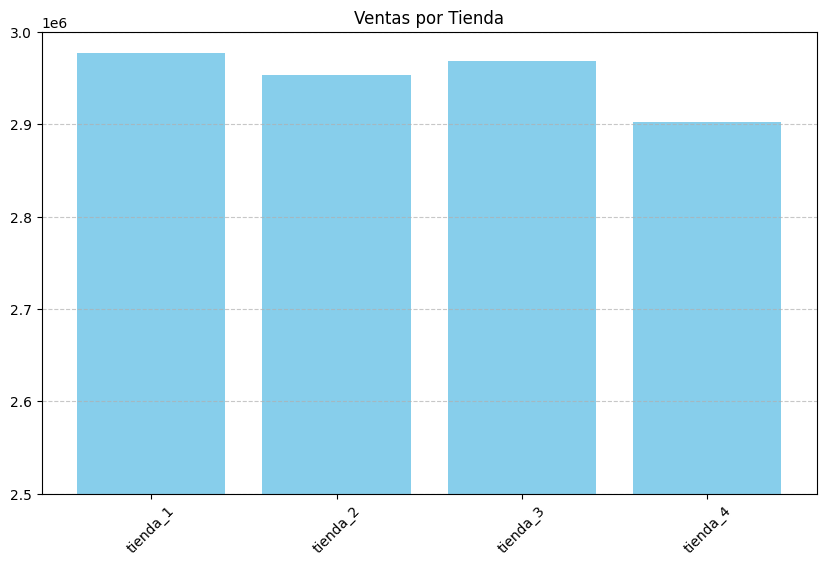

In [32]:

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.bar(df['tienda'], df['Precio'], color='skyblue')

#for i, v in enumerate(df['Precio']):
#    plt.text(i, v + 50000, f'${v:,.0f}', ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.ylim(2500000, 3000000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Ventas por Tienda')
plt.show()

Se puede observar que la tienda 1 y tienda dos son las que más venden, por otro lado, la tienda 4 es la que menos vende

# 2. Ventas por categoría

In [33]:
# Crear tabla pivot con totales
tabla_pivot = df.pivot_table(
    index='Categoría del Producto',
    columns='tienda',
    values='Precio',
    aggfunc='sum',
    fill_value=0
)

# Totales por categoría (fila)
tabla_pivot['Total Categoría'] = tabla_pivot.sum(axis=1)

# Totales por tienda (columna)
tabla_pivot.loc['Total Tienda'] = tabla_pivot.sum(axis=0)

# Formato contable sin usar applymap (evita el warning)
tabla_pivot_formateada = tabla_pivot.apply(lambda col: col.map(lambda x: f"${x:,.0f}"))

# Mostrar resultado
print(tabla_pivot_formateada)

tienda                         tienda_1        tienda_2        tienda_3  \
Categoría del Producto                                                    
Artículos para el hogar     $12,698,400     $14,746,900     $15,060,000   
Deportes y diversión        $39,290,000     $34,744,500     $35,593,100   
Electrodomésticos          $363,685,200    $348,567,800    $329,237,900   
Electrónicos               $429,493,500    $410,831,100    $410,775,800   
Instrumentos musicales      $91,299,000    $104,990,300     $77,380,900   
Juguetes                    $17,995,700     $15,945,400     $19,401,100   
Libros                       $8,784,900     $10,091,200      $9,498,700   
Muebles                    $187,633,700    $176,426,300    $201,072,100   
Total Tienda             $1,150,880,400  $1,116,343,500  $1,098,019,600   

tienda                         tienda_4 Total Categoría  
Categoría del Producto                                   
Artículos para el hogar     $15,074,500     $57,579,800  


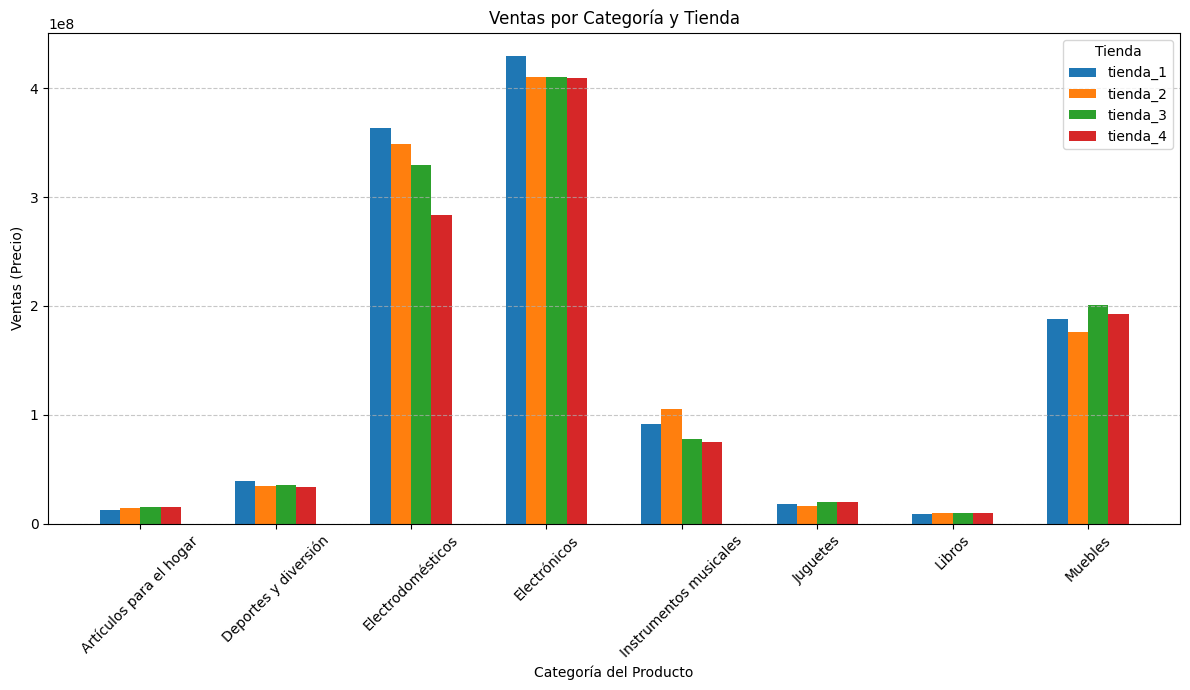

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Crear tabla de ventas por Categoría y Tienda
ventas = df.pivot_table(
    index='Categoría del Producto',
    columns='tienda',
    values='Precio',
    aggfunc='sum',
    fill_value=0
)

# Paso 2: Crear gráfico de columnas agrupadas
categorias = ventas.index
tiendas = ventas.columns
x = range(len(categorias))
ancho_barra = 0.15  # Puedes ajustarlo según la cantidad de tiendas

plt.figure(figsize=(12, 7))

# Dibujar una barra por cada tienda desplazada horizontalmente
for i, tienda in enumerate(tiendas):
    plt.bar(
        [pos + i * ancho_barra for pos in x],
        ventas[tienda],
        width=ancho_barra,
        label=tienda
    )

# Paso 3: Formato del eje X y etiquetas
plt.xticks([pos + ancho_barra * (len(tiendas) / 2 - 0.5) for pos in x], categorias, rotation=45)
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas (Precio)')
plt.title('Ventas por Categoría y Tienda')
plt.legend(title='Tienda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos ver  que las categorías que más ventas tuvieron fueron, los electrónicos, seguida de los electrónicos y en tercee lugar son loas muebles, este mismo patrón se distribuye entre cada tienda.

# 3. Calificación promedio de la tienda


In [11]:
promedio_calificacion = df.groupby('tienda')['Calificación'].mean()
media_general = DF_mean['Calificación'].mean()
desviacion_std = DF_mean['Calificación'].std()
coeficiente_variacion = (desviacion_std / media_general) * 100
print(f"El coeficiente de variación es: {coeficiente_variacion:.2f}%")
DF_mean= pd.DataFrame(promedio_calificacion.round(2))
print(DF_mean)

El coeficiente de variación es: 0.82%
          Calificación
tienda                
tienda_1          3.98
tienda_2          4.04
tienda_3          4.05
tienda_4          4.00


Vemos que apesar de ser la tienda 1 la que más vende, es la que peor calificación tiene, sin embargo, el promedio de calificación se mantiene parecido entre las tiendas, teniendo un coeficiente de variación menor al 1%. Es decir que las diferencias en la califiación no son significativas.

# 4. Productos más y menos vendidos

In [18]:
valor_ventas_por_producto = df.groupby('Producto')['Precio'].sum()
cantidad_ventas_por_producto = df.groupby('Producto')['Precio'].count()
producto_mas_vendido= cantidad_ventas_por_producto.idxmax()
cantidad_ventas_producto_mas_vendido = cantidad_ventas_por_producto.max()
valor_ventas_producto_mas_vendido = valor_ventas_por_producto.max()
print(f"El producto más vendido es: {producto_mas_vendido},")
print(f"con una cantidad de ventas de {cantidad_ventas_producto_mas_vendido},")
print(f"con un valor de ventas de {valor_ventas_producto_mas_vendido:,.0f}".replace(",", "."))  # Con punto si es estilo colombiano
producto_menos_vendido = cantidad_ventas_por_producto.idxmin()
cantidad_ventas_producto_menos_vendido = cantidad_ventas_por_producto.min()
valor_ventas_producto_menos_vendido = valor_ventas_por_producto.min()
print(f"\nEl producto menos vendido es: {producto_menos_vendido},")
print(f"con una cantidad de ventas de {cantidad_ventas_producto_menos_vendido},")
print(f"con un valor de ventas de {valor_ventas_producto_menos_vendido:,.0f}".replace(",", "."))

El producto más vendido es: Mesa de noche,
con una cantidad de ventas de 210,
con un valor de ventas de 432.489.600

El producto menos vendido es: Celular ABXY,
con una cantidad de ventas de 157,
con un valor de ventas de 2.729.300


In [27]:
# 1. Ventas de "Mesa de noche" por tienda
ventas_mesa = (
    df[df['Producto'] == 'Mesa de noche']
    .groupby('tienda')['Precio']
    .sum()
    .sort_values(ascending=False)
)

# 2. Ventas de "Celular ABXY" por tienda
ventas_celular = (
    df[df['Producto'] == 'Celular ABXY']
    .groupby('tienda')['Precio']
    .sum()
    .sort_values(ascending=False)
)

# 3. Formatear a contabilidad
ventas_mesa_formateado = ventas_mesa.apply(lambda x: f"${x:,.0f}".replace(",", "."))
ventas_celular_formateado = ventas_celular.apply(lambda x: f"${x:,.0f}".replace(",", "."))

# 4. Mostrar resultados
print("📦 Ventas de 'Mesa de noche' por tienda (ordenadas):")
print(ventas_mesa_formateado)

print("\n📱 Ventas de 'Celular ABXY' por tienda (ordenadas):")
print(ventas_celular_formateado)

📦 Ventas de 'Mesa de noche' por tienda (ordenadas):
tienda
tienda_1    $15.679.600
tienda_3    $15.365.500
tienda_4    $15.144.100
tienda_2    $12.230.300
Name: Precio, dtype: object

📱 Ventas de 'Celular ABXY' por tienda (ordenadas):
tienda
tienda_3    $43.419.600
tienda_2    $41.668.900
tienda_4    $40.171.600
tienda_1    $32.651.000
Name: Precio, dtype: object


Vemos que el producto más vendido fue la mesa de noche y el menos vendido fue el celular, sin embargo, no hay diferencias significativas de venta por tienda.

# 5. Envío promedio por tienda

In [38]:
Envio_promedio_por_tienda = df.groupby('tienda')['Costo de envío'].mean()
print(Envio_promedio_por_tienda)

tienda
tienda_1    26018.609580
tienda_2    25216.235693
tienda_3    24805.680373
tienda_4    23459.457167
Name: Costo de envío, dtype: float64


<ipython-input-42-9a4fdf5b61f9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_envio.index, y=promedio_envio.values, palette='Blues_d')


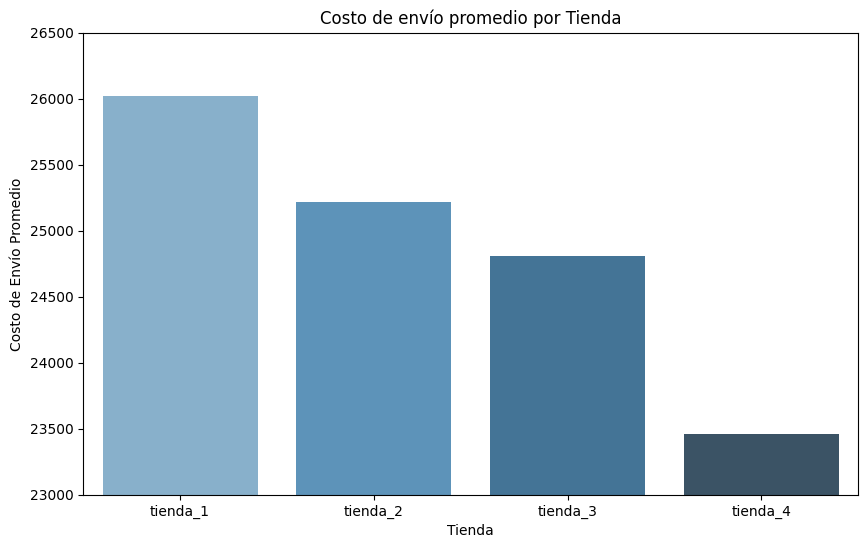

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Agrupar por tienda y calcular promedio del costo de envío
promedio_envio = df.groupby('tienda')['Costo de envío'].mean().sort_values(ascending=False)

# 2. Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_envio.index, y=promedio_envio.values, palette='Blues_d')

# 3. Configurar etiquetas y título
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.ylim(23000,26500)
plt.title('Costo de envío promedio por Tienda')
plt.show()

Vemos que el costo de envío promedio es más grande en la tienda 1, sin embargo, hay que validar que tanto incrementa esto el valor del producto:

In [44]:
promedio_ventas = df.groupby('tienda')['Precio'].mean()
print(promedio_ventas)



tienda
tienda_1    487867.910131
tienda_2    473227.426876
tienda_3    465459.771089
tienda_4    440362.892282
Name: Precio, dtype: float64


In [45]:
# 1. Unirlas en un solo DataFrame
df_comparacion = pd.concat([promedio_envio, promedio_ventas], axis=1)

# 2. Renombrar columnas para claridad
df_comparacion.columns = ['Promedio_envio', 'Promedio_ventas']

# 3. Calcular la columna adicional
df_comparacion['Incremento precio por envío'] = df_comparacion['Promedio_envio'] / df_comparacion['Promedio_ventas']

# 4. Opcional: dar formato porcentual a la columna de incremento
df_comparacion['Incremento precio por envío'] = df_comparacion['Incremento precio por envío'] * 100

# 5. Mostrar con dos decimales
df_comparacion = df_comparacion.round(2)

print(df_comparacion)

          Promedio_envio  Promedio_ventas  Incremento precio por envío
tienda                                                                
tienda_1        26018.61        487867.91                         5.33
tienda_2        25216.24        473227.43                         5.33
tienda_3        24805.68        465459.77                         5.33
tienda_4        23459.46        440362.89                         5.33


Vemos que el incremento del precio por envío se debe únicamente al valor del producto, ya que aumenta homogéneamente entre las distintas tiendas y que la que más vende mayor promedio de costo de envío tiene.

# Conclusiones

Las tiendas tienen un comportamiento muy similar entre sí, con excepción del valor de ventas, ni la calificación ni las ventas por categoría ni los productos ni los costos de envío representan una diferencia significativa entre las ventas. Sin embargo, si se tuviera que cerrar una tienda, recomendaría que se cerrara la tienda 4, ya que esta vende significativamente menos que el resto.
